In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds_train = pd.read_csv('outputs/df_train.csv')
diamonds_train_price = pd.read_csv('outputs/df_train_price.csv')
diamonds_predict=pd.read_csv('outputs/df_test.csv')
submit=pd.read_csv('inputs/sample_submission.csv')

In [3]:
diamonds_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096


In [4]:
diamonds_predict.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505


# Split train and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamonds_train, diamonds_train_price, test_size=0.01)

In [6]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
13119,0.513571,-1.707140,0.352161,-0.641579,1.295181,0.691721,0.598080,0.544525,0.736181
9170,0.428980,0.086012,0.352161,1.182263,-1.290446,1.139020,0.687265,0.631402,0.482498
19003,-0.543811,0.086012,-2.002272,-0.033632,0.596363,0.244422,-0.454298,-0.497990,-0.405390
13216,3.157026,0.086012,-0.236447,-1.249527,0.456599,1.139020,2.390692,2.282051,2.385116
5318,1.761282,0.086012,-1.413663,0.574315,-0.591628,0.244422,1.695051,1.604416,1.539508


In [7]:
y_test.shape

(405, 1)

# GaussianNB

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
gnb = GaussianNB()

In [10]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

/home/must4in3/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
y_test_gNB = y_test.copy()
y_test_gNB['y']= y_pred

In [12]:
y_test_gNB['Price-y'] = abs(y_test_gNB['price']- y_test_gNB['y'])
y_test_gNB.describe()

,price,y,Price-y
count,405.000000,405.000000,405.000000
mean,3915.701235,3829.807407,691.567901
std,3865.534872,3630.155158,1151.298416
min,386.000000,386.000000,0.000000
25%,987.000000,981.000000,118.000000
50%,2399.000000,2481.000000,285.000000
75%,5455.000000,5312.000000,780.000000
max,17829.000000,17534.000000,9777.000000


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'RMSE={mean_squared_error(y_pred, y_test)**0.5}')

RMSE=1341.8201798533694


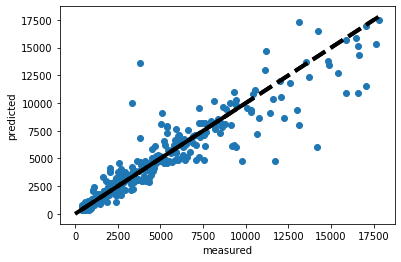

In [14]:
fig, ax = plt.subplots()
ax.scatter( y_test_gNB['price'], y_test_gNB['y'])
ax.plot([y_test_gNB.min(), y_test_gNB.max()], [y_test_gNB.min(), y_test_gNB.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()